In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Sin Portfolio

## Finding active stocks in each month

In [68]:
sin_pivot = pd.read_csv("sin_pivot.csv")
sin_stocks = pd.read_csv("sin_stocks.csv")

In [69]:
sin_pivot["datadate"] = pd.to_datetime(sin_pivot["datadate"])
sin_pivot.set_index("datadate",inplace=True)

In [70]:
sin_portfolio = sin_pivot.copy()
sin_portfolio["Num_Active_Stocks"] = len(sin_stocks["tic"].unique()) - sin_portfolio.isnull().sum(axis = 1)
sin_portfolio["Portfolio_Proportion"] = 1/sin_portfolio["Num_Active_Stocks"]

sin_portfolio

,2788A,3157B,3ALES.,3BACDA,3BBTCE,3BETM,3BOBR,3BRAUE,3CGMI,3CGMI.,...,WDKA,WFSN.1,WIKD,WIMHY,WNWN,WVVI,WYNMY,WYNN,Num_Active_Stocks,Portfolio_Proportion
datadate,,,,,,,,,,,,,,,,,,,,,
1962-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,0.100000
1962-03-31,-0.048544,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,0.076923
1962-04-30,-0.071429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,0.076923
1962-05-31,-0.057693,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,0.076923
1962-06-30,-0.065088,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,0.076923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.025392,-0.148022,-0.116127,107,0.009346
2022-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-0.328664,-0.065172,-0.062145,106,0.009434
2022-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.006421,0.163412,-0.137973,102,0.009804


## Multiplying each row by its respective portfolio proportions

In [71]:
sin_portfolio_returns = sin_portfolio.mul(sin_portfolio["Portfolio_Proportion"], axis = 0)
sin_portfolio_returns.drop(columns = ["Num_Active_Stocks", "Portfolio_Proportion"], inplace = True)
sin_portfolio_returns

,2788A,3157B,3ALES.,3BACDA,3BBTCE,3BETM,3BOBR,3BRAUE,3CGMI,3CGMI.,...,WBEV,WBR.,WDKA,WFSN.1,WIKD,WIMHY,WNWN,WVVI,WYNMY,WYNN
datadate,,,,,,,,,,,,,,,,,,,,,
1962-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-03-31,-0.003734,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-04-30,-0.005495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-05-31,-0.004438,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-06-30,-0.005007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.000678,-0.000663,NaN,NaN,NaN,NaN,NaN,0.000237,-0.001383,-0.001085
2022-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.002535,-0.000529,NaN,NaN,NaN,NaN,NaN,-0.003101,-0.000615,-0.000586
2022-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.002736,-0.000165,NaN,NaN,NaN,NaN,NaN,0.000063,0.001602,-0.001353


In [72]:
sin_portfolio_returns["Portfolio_Returns"] = sin_portfolio_returns.sum(axis = 1)
sin_portfolio_returns["Portfolio_Proportion"] = sin_portfolio["Portfolio_Proportion"]
sin_portfolio_merged = pd.concat([sin_portfolio[["Num_Active_Stocks"]], sin_portfolio_returns], axis = 1, join = "inner")

sin_portfolio_merged

,Num_Active_Stocks,2788A,3157B,3ALES.,3BACDA,3BBTCE,3BETM,3BOBR,3BRAUE,3CGMI,...,WDKA,WFSN.1,WIKD,WIMHY,WNWN,WVVI,WYNMY,WYNN,Portfolio_Returns,Portfolio_Proportion
datadate,,,,,,,,,,,,,,,,,,,,,
1962-02-28,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.016444,0.100000
1962-03-31,13,-0.003734,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.011945,0.076923
1962-04-30,13,-0.005495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.073594,0.076923
1962-05-31,13,-0.004438,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.138066,0.076923
1962-06-30,13,-0.005007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.052827,0.076923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-30,107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000237,-0.001383,-0.001085,-0.075549,0.009346
2022-05-31,106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-0.003101,-0.000615,-0.000586,-0.077684,0.009434
2022-06-30,102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000063,0.001602,-0.001353,-0.072432,0.009804


In [73]:
moved_cols = ["Portfolio_Returns", "Portfolio_Proportion"]

sin_portfolio_merged = sin_portfolio_merged[moved_cols + [col for col in sin_portfolio_merged.columns if col not in moved_cols]]
sin_portfolio_merged.head()

,Portfolio_Returns,Portfolio_Proportion,Num_Active_Stocks,2788A,3157B,3ALES.,3BACDA,3BBTCE,3BETM,3BOBR,...,WBEV,WBR.,WDKA,WFSN.1,WIKD,WIMHY,WNWN,WVVI,WYNMY,WYNN
datadate,,,,,,,,,,,,,,,,,,,,,
1962-02-28,0.016444,0.100000,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-03-31,-0.011945,0.076923,13,-0.003734,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-04-30,-0.073594,0.076923,13,-0.005495,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-05-31,-0.138066,0.076923,13,-0.004438,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-06-30,-0.052827,0.076923,13,-0.005007,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
sin_portfolio_merged.describe()["Portfolio_Returns"]

count    727.000000
mean      -0.010738
std        0.044320
min       -0.257608
25%       -0.036379
50%       -0.010125
75%        0.015994
max        0.177219
Name: Portfolio_Returns, dtype: float64

# Cleaning Fama

In [75]:
fama_df = pd.read_csv("Fama-French.csv")

In [76]:
fama_df["dateff"] = pd.to_datetime(fama_df["dateff"])
fama_df

,dateff,mktrf,smb,hml,rf,umd
0,1962-01-31,-0.0387,0.0177,0.0513,0.0024,-0.0203
1,1962-02-28,0.0181,-0.0115,0.0082,0.0020,-0.0101
2,1962-03-30,-0.0068,0.0052,-0.0138,0.0020,0.0184
3,1962-04-30,-0.0659,-0.0070,0.0003,0.0022,0.0291
4,1962-05-31,-0.0865,-0.0334,0.0277,0.0024,0.0041
...,...,...,...,...,...,...
722,2022-03-31,0.0305,-0.0160,-0.0180,0.0001,0.0300
723,2022-04-29,-0.0946,-0.0141,0.0619,0.0001,0.0489
724,2022-05-31,-0.0034,-0.0185,0.0841,0.0003,0.0248
725,2022-06-30,-0.0843,0.0209,-0.0597,0.0006,0.0079


In [77]:
fama_df.set_index("dateff", inplace=True)

In [78]:
from pandas.tseries.offsets import MonthEnd

sin_pivot.index = sin_pivot.index + MonthEnd(0)
sin_pivot

,2788A,3157B,3ALES.,3BACDA,3BBTCE,3BETM,3BOBR,3BRAUE,3CGMI,3CGMI.,...,WBEV,WBR.,WDKA,WFSN.1,WIKD,WIMHY,WNWN,WVVI,WYNMY,WYNN
datadate,,,,,,,,,,,,,,,,,,,,,
1962-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-03-31,-0.048544,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-04-30,-0.071429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-05-31,-0.057693,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-06-30,-0.065088,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.072555,-0.070981,NaN,NaN,NaN,NaN,NaN,0.025392,-0.148022,-0.116127
2022-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.268707,-0.056090,NaN,NaN,NaN,NaN,NaN,-0.328664,-0.065172,-0.062145
2022-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.279070,-0.016787,NaN,NaN,NaN,NaN,NaN,0.006421,0.163412,-0.137973


# Sin Regression

In [79]:
sin_returns = sin_portfolio_merged[["Portfolio_Returns"]]
sin_returns

,Portfolio_Returns
datadate,
1962-02-28,0.016444
1962-03-31,-0.011945
1962-04-30,-0.073594
1962-05-31,-0.138066
1962-06-30,-0.052827
...,...
2022-04-30,-0.075549
2022-05-31,-0.077684
2022-06-30,-0.072432


In [80]:
fama_df.index = fama_df.index + MonthEnd(0)
fama_df

,mktrf,smb,hml,rf,umd
dateff,,,,,
1962-01-31,-0.0387,0.0177,0.0513,0.0024,-0.0203
1962-02-28,0.0181,-0.0115,0.0082,0.0020,-0.0101
1962-03-31,-0.0068,0.0052,-0.0138,0.0020,0.0184
1962-04-30,-0.0659,-0.0070,0.0003,0.0022,0.0291
1962-05-31,-0.0865,-0.0334,0.0277,0.0024,0.0041
...,...,...,...,...,...
2022-03-31,0.0305,-0.0160,-0.0180,0.0001,0.0300
2022-04-30,-0.0946,-0.0141,0.0619,0.0001,0.0489
2022-05-31,-0.0034,-0.0185,0.0841,0.0003,0.0248


In [81]:
sin_model_df = pd.concat([sin_returns, fama_df], axis = 1, join = "inner")
sin_model_df

,Portfolio_Returns,mktrf,smb,hml,rf,umd
1962-02-28,0.016444,0.0181,-0.0115,0.0082,0.0020,-0.0101
1962-03-31,-0.011945,-0.0068,0.0052,-0.0138,0.0020,0.0184
1962-04-30,-0.073594,-0.0659,-0.0070,0.0003,0.0022,0.0291
1962-05-31,-0.138066,-0.0865,-0.0334,0.0277,0.0024,0.0041
1962-06-30,-0.052827,-0.0847,-0.0059,0.0255,0.0020,0.0646
...,...,...,...,...,...,...
2022-03-31,-0.034963,0.0305,-0.0160,-0.0180,0.0001,0.0300
2022-04-30,-0.075549,-0.0946,-0.0141,0.0619,0.0001,0.0489
2022-05-31,-0.077684,-0.0034,-0.0185,0.0841,0.0003,0.0248
2022-06-30,-0.072432,-0.0843,0.0209,-0.0597,0.0006,0.0079


In [82]:
sin_model_df["Portfolio_Excess_Returns"] = sin_model_df["Portfolio_Returns"] - sin_model_df["rf"]
sin_model_df

,Portfolio_Returns,mktrf,smb,hml,rf,umd,Portfolio_Excess_Returns
1962-02-28,0.016444,0.0181,-0.0115,0.0082,0.0020,-0.0101,0.014444
1962-03-31,-0.011945,-0.0068,0.0052,-0.0138,0.0020,0.0184,-0.013945
1962-04-30,-0.073594,-0.0659,-0.0070,0.0003,0.0022,0.0291,-0.075794
1962-05-31,-0.138066,-0.0865,-0.0334,0.0277,0.0024,0.0041,-0.140466
1962-06-30,-0.052827,-0.0847,-0.0059,0.0255,0.0020,0.0646,-0.054827
...,...,...,...,...,...,...,...
2022-03-31,-0.034963,0.0305,-0.0160,-0.0180,0.0001,0.0300,-0.035063
2022-04-30,-0.075549,-0.0946,-0.0141,0.0619,0.0001,0.0489,-0.075649
2022-05-31,-0.077684,-0.0034,-0.0185,0.0841,0.0003,0.0248,-0.077984
2022-06-30,-0.072432,-0.0843,0.0209,-0.0597,0.0006,0.0079,-0.073032


In [83]:
sin_model_df.rename(columns = {"mktrf": "ExRm", "smb": "SMB", "hml": "HML", "umd": "MOM"}, inplace=True)

In [84]:
sin_model_df

,Portfolio_Returns,ExRm,SMB,HML,rf,MOM,Portfolio_Excess_Returns
1962-02-28,0.016444,0.0181,-0.0115,0.0082,0.0020,-0.0101,0.014444
1962-03-31,-0.011945,-0.0068,0.0052,-0.0138,0.0020,0.0184,-0.013945
1962-04-30,-0.073594,-0.0659,-0.0070,0.0003,0.0022,0.0291,-0.075794
1962-05-31,-0.138066,-0.0865,-0.0334,0.0277,0.0024,0.0041,-0.140466
1962-06-30,-0.052827,-0.0847,-0.0059,0.0255,0.0020,0.0646,-0.054827
...,...,...,...,...,...,...,...
2022-03-31,-0.034963,0.0305,-0.0160,-0.0180,0.0001,0.0300,-0.035063
2022-04-30,-0.075549,-0.0946,-0.0141,0.0619,0.0001,0.0489,-0.075649
2022-05-31,-0.077684,-0.0034,-0.0185,0.0841,0.0003,0.0248,-0.077984
2022-06-30,-0.072432,-0.0843,0.0209,-0.0597,0.0006,0.0079,-0.073032


## Including Recession Indicator

In [85]:
recession = pd.read_csv("USREC.csv")

In [86]:
recession["DATE"] = pd.to_datetime(recession["DATE"])
recession["DATE"] = recession["DATE"] + MonthEnd(0)
recession

,DATE,USREC
0,1854-12-31,1
1,1855-01-31,0
2,1855-02-28,0
3,1855-03-31,0
4,1855-04-30,0
...,...,...
2008,2022-04-30,0
2009,2022-05-31,0
2010,2022-06-30,0
2011,2022-07-31,0


In [87]:
recession.set_index("DATE", inplace=True)

In [88]:
sin_model_df2 = pd.concat([sin_model_df, recession], axis = 1, join = "inner")
sin_model_df2

,Portfolio_Returns,ExRm,SMB,HML,rf,MOM,Portfolio_Excess_Returns,USREC
1962-02-28,0.016444,0.0181,-0.0115,0.0082,0.0020,-0.0101,0.014444,0
1962-03-31,-0.011945,-0.0068,0.0052,-0.0138,0.0020,0.0184,-0.013945,0
1962-04-30,-0.073594,-0.0659,-0.0070,0.0003,0.0022,0.0291,-0.075794,0
1962-05-31,-0.138066,-0.0865,-0.0334,0.0277,0.0024,0.0041,-0.140466,0
1962-06-30,-0.052827,-0.0847,-0.0059,0.0255,0.0020,0.0646,-0.054827,0
...,...,...,...,...,...,...,...,...
2022-03-31,-0.034963,0.0305,-0.0160,-0.0180,0.0001,0.0300,-0.035063,0
2022-04-30,-0.075549,-0.0946,-0.0141,0.0619,0.0001,0.0489,-0.075649,0
2022-05-31,-0.077684,-0.0034,-0.0185,0.0841,0.0003,0.0248,-0.077984,0
2022-06-30,-0.072432,-0.0843,0.0209,-0.0597,0.0006,0.0079,-0.073032,0


In [89]:
sin_model_df2["Portfolio_Excess_Returns"].describe()

count    726.000000
mean      -0.014279
std        0.043918
min       -0.263608
25%       -0.039695
50%       -0.012751
75%        0.012160
max        0.171419
Name: Portfolio_Excess_Returns, dtype: float64

## Plots for Sin Portfolio

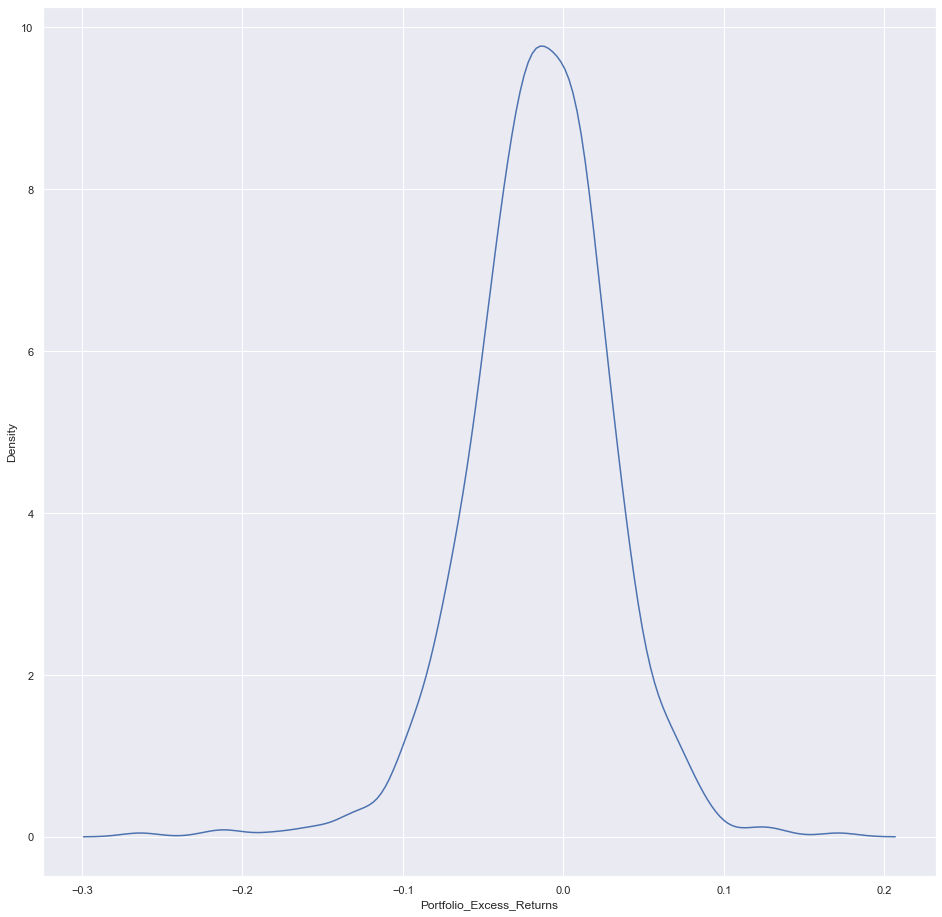

In [90]:
import seaborn as sns
sns.set(rc = {"figure.figsize": (16,16)})
fig1 = sns.kdeplot(sin_model_df2["Portfolio_Excess_Returns"])



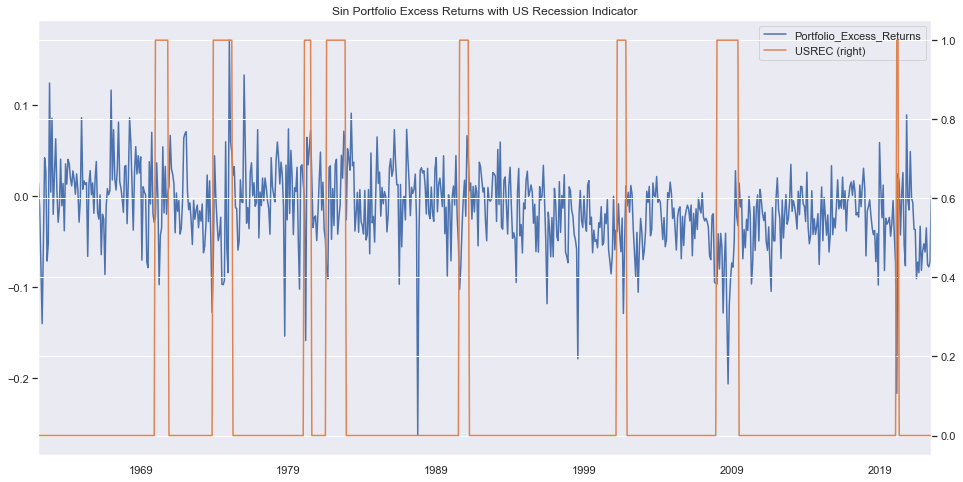

In [91]:
sin_model_df2[["Portfolio_Excess_Returns", "USREC"]].plot(secondary_y = ["USREC"], figsize = (16,8), title = "Sin Portfolio Excess Returns with US Recession Indicator")

## Sin Regressions

In [92]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
X = sin_model_df2[["ExRm", "SMB", "HML", "MOM"]]
y = sin_model_df2["Portfolio_Excess_Returns"]

X = sm.add_constant(X)

model = sm.OLS(y, X)
result = model.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     Portfolio_Excess_Returns   R-squared:                       0.576
Model:                                  OLS   Adj. R-squared:                  0.574
Method:                       Least Squares   F-statistic:                     245.3
Date:                      Tue, 13 Sep 2022   Prob (F-statistic):          6.63e-133
Time:                              14:31:31   Log-Likelihood:                 1551.3
No. Observations:                       726   AIC:                            -3093.
Df Residuals:                           721   BIC:                            -3070.
Df Model:                                 4                                         
Covariance Type:                  nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0192      0.001    -17.312      0.000      -0.021      -0.017
ExRm           0.6551      0.026     25.352      0.000       0.604       0.706
SMB            0.3583      0.037      9.661      0.000       0.285       0.431
HML            0.2011      0.039      5.213      0.000       0.125       0.277
MOM            0.0021      0.027      0.077      0.939      -0.051       0.055
==============================================================================
Omnibus:                       25.702   Durbin-Watson:                   1.259
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.487
Skew:                          -0.459   Prob(JB):                     1.07e-06
Kurtosis:                       3.257   Cond. No.                         38.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [93]:
import statsmodels.formula.api as smf
formula_3 = "Portfolio_Excess_Returns ~ ExRm + SMB + HML + MOM + USREC + USREC * ExRm + USREC * SMB + USREC * HML + USREC * MOM"

interaction_model = smf.ols(formula = formula_3, data = sin_model_df2)
result2 = interaction_model.fit()
result2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     Portfolio_Excess_Returns   R-squared:                       0.589
Model:                                  OLS   Adj. R-squared:                  0.584
Method:                       Least Squares   F-statistic:                     114.2
Date:                      Tue, 13 Sep 2022   Prob (F-statistic):          4.45e-132
Time:                              14:31:32   Log-Likelihood:                 1562.6
No. Observations:                       726   AIC:                            -3105.
Df Residuals:                           716   BIC:                            -3059.
Df Model:                                 9                                         
Covariance Type:                  nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0177      0.001    -14.971      0.000      -0.020      -0.015
ExRm           0.6194      0.030     20.954      0.000       0.561       0.677
SMB            0.3579      0.040      8.977      0.000       0.280       0.436
HML            0.1625      0.044      3.727      0.000       0.077       0.248
MOM           -0.0548      0.031     -1.756      0.080      -0.116       0.006
USREC         -0.0061      0.003     -1.839      0.066      -0.013       0.000
USREC:ExRm     0.1723      0.062      2.768      0.006       0.050       0.294
USREC:SMB      0.1138      0.107      1.064      0.288      -0.096       0.324
USREC:HML      0.1385      0.090      1.533      0.126      -0.039       0.316
USREC:MOM      0.2659      0.065      4.119      0.000       0.139       0.393
==============================================================================
Omnibus:                       19.273   Durbin-Watson:                   1.247
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.085
Skew:                          -0.399   Prob(JB):                     4.35e-05
Kurtosis:                       3.169   Cond. No.                         106.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Stim Portfolio

In [94]:
stim_pivot = pd.read_csv("stim_pivot.csv")
stim_stocks = pd.read_csv("stim_stocks.csv")

In [95]:
stim_pivot["datadate"] = pd.to_datetime(stim_pivot["datadate"])
stim_pivot.set_index("datadate",inplace=True)

In [96]:
stim_portfolio = stim_pivot.copy()
stim_portfolio["Num_Active_Stocks"] = len(stim_stocks["tic"].unique()) - stim_portfolio.isnull().sum(axis = 1)
stim_portfolio["Portfolio_Proportion"] = 1/stim_portfolio["Num_Active_Stocks"]

stim_portfolio_returns = stim_portfolio.mul(stim_portfolio["Portfolio_Proportion"], axis = 0)
stim_portfolio_returns.drop(columns = ["Num_Active_Stocks", "Portfolio_Proportion"], inplace = True)
stim_portfolio_returns["Portfolio_Returns"] = stim_portfolio_returns.sum(axis = 1)
stim_portfolio_returns["Portfolio_Proportion"] = stim_portfolio["Portfolio_Proportion"]
stim_portfolio_merged = pd.concat([stim_portfolio[["Num_Active_Stocks"]], stim_portfolio_returns], axis = 1, join = "inner")


In [97]:
moved_cols = ["Portfolio_Returns", "Portfolio_Proportion"]

stim_portfolio_merged = stim_portfolio_merged[moved_cols + [col for col in stim_portfolio_merged.columns if col not in moved_cols]]
stim_portfolio_merged.head()

,Portfolio_Returns,Portfolio_Proportion,Num_Active_Stocks,3PLFF,BGMTQ,BKCT,BRCC,CHF.,CTEA,FARM,...,NUZE,PEET,PLAG,RVACU,SBEAU,SWP.,SWSSF,UOLI,WEST,WFGCF
datadate,,,,,,,,,,,,,,,,,,,,,
1965-12-31,-0.002174,1.0,1,NaN,NaN,NaN,NaN,-0.002174,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1966-01-31,0.021978,1.0,1,NaN,NaN,NaN,NaN,0.021978,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1966-02-28,-0.021505,1.0,1,NaN,NaN,NaN,NaN,-0.021505,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1966-03-31,-0.057143,1.0,1,NaN,NaN,NaN,NaN,-0.057143,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1966-04-30,0.023530,1.0,1,NaN,NaN,NaN,NaN,0.023530,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Merging Stim, FAMA, and Recession

In [98]:
from pandas.tseries.offsets import MonthEnd

stim_pivot.index = stim_pivot.index + MonthEnd(0)
stim_pivot

,3PLFF,BGMTQ,BKCT,BRCC,CHF.,CTEA,FARM,FHAI,GMCR,HCEI,...,NUZE,PEET,PLAG,RVACU,SBEAU,SWP.,SWSSF,UOLI,WEST,WFGCF
datadate,,,,,,,,,,,,,,,,,,,,,
1965-12-31,NaN,NaN,NaN,NaN,-0.002174,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1966-01-31,NaN,NaN,NaN,NaN,0.021978,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1966-02-28,NaN,NaN,NaN,NaN,-0.021505,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1966-03-31,NaN,NaN,NaN,NaN,-0.057143,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1966-04-30,NaN,NaN,NaN,NaN,0.023530,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-30,NaN,NaN,NaN,-0.286057,NaN,NaN,-0.117978,0.137931,NaN,NaN,...,-0.273973,NaN,-0.130726,0.045000,NaN,-0.106109,-0.082771,0.166667,0.014366,NaN
2022-05-31,NaN,NaN,NaN,-0.334228,NaN,NaN,-0.203822,-0.075758,NaN,-0.99,...,-0.132075,NaN,0.203333,-0.003847,NaN,-0.032374,-0.129744,-0.028571,-0.002066,-0.995838
2022-06-30,NaN,NaN,NaN,-0.177419,NaN,NaN,-0.062000,0.000000,NaN,NaN,...,-0.268116,NaN,-0.158214,0.008665,NaN,-0.081784,-0.010728,-0.019608,0.002525,0.000000


In [99]:
stim_returns = stim_portfolio_merged[["Portfolio_Returns"]]
stim_returns

,Portfolio_Returns
datadate,
1965-12-31,-0.002174
1966-01-31,0.021978
1966-02-28,-0.021505
1966-03-31,-0.057143
1966-04-30,0.023530
...,...
2022-04-30,-0.079998
2022-05-31,-0.197442
2022-06-30,-0.057121


In [100]:
stim_model_df = pd.concat([stim_returns, fama_df], axis = 1, join = "inner")
stim_model_df

,Portfolio_Returns,mktrf,smb,hml,rf,umd
1965-12-31,-0.002174,0.0101,0.0206,0.0203,0.0033,0.0012
1966-01-31,0.021978,0.0072,0.0384,0.0356,0.0038,0.0539
1966-02-28,-0.021505,-0.0121,0.0440,0.0033,0.0035,0.0457
1966-03-31,-0.057143,-0.0251,0.0099,-0.0198,0.0038,0.0142
1966-04-30,0.023530,0.0214,0.0343,-0.0046,0.0034,0.0628
...,...,...,...,...,...,...
2022-03-31,0.039213,0.0305,-0.0160,-0.0180,0.0001,0.0300
2022-04-30,-0.079998,-0.0946,-0.0141,0.0619,0.0001,0.0489
2022-05-31,-0.197442,-0.0034,-0.0185,0.0841,0.0003,0.0248
2022-06-30,-0.057121,-0.0843,0.0209,-0.0597,0.0006,0.0079


In [101]:
stim_model_df["Portfolio_Excess_Returns"] = stim_model_df["Portfolio_Returns"] - stim_model_df["rf"]
stim_model_df

,Portfolio_Returns,mktrf,smb,hml,rf,umd,Portfolio_Excess_Returns
1965-12-31,-0.002174,0.0101,0.0206,0.0203,0.0033,0.0012,-0.005474
1966-01-31,0.021978,0.0072,0.0384,0.0356,0.0038,0.0539,0.018178
1966-02-28,-0.021505,-0.0121,0.0440,0.0033,0.0035,0.0457,-0.025005
1966-03-31,-0.057143,-0.0251,0.0099,-0.0198,0.0038,0.0142,-0.060943
1966-04-30,0.023530,0.0214,0.0343,-0.0046,0.0034,0.0628,0.020130
...,...,...,...,...,...,...,...
2022-03-31,0.039213,0.0305,-0.0160,-0.0180,0.0001,0.0300,0.039113
2022-04-30,-0.079998,-0.0946,-0.0141,0.0619,0.0001,0.0489,-0.080098
2022-05-31,-0.197442,-0.0034,-0.0185,0.0841,0.0003,0.0248,-0.197742
2022-06-30,-0.057121,-0.0843,0.0209,-0.0597,0.0006,0.0079,-0.057721


In [102]:
stim_model_df.rename(columns = {"mktrf": "ExRm", "smb": "SMB", "hml": "HML", "umd": "MOM"}, inplace=True)

In [103]:
stim_model_df2 = pd.concat([stim_model_df, recession], axis = 1, join = "inner")
stim_model_df2

,Portfolio_Returns,ExRm,SMB,HML,rf,MOM,Portfolio_Excess_Returns,USREC
1965-12-31,-0.002174,0.0101,0.0206,0.0203,0.0033,0.0012,-0.005474,0
1966-01-31,0.021978,0.0072,0.0384,0.0356,0.0038,0.0539,0.018178,0
1966-02-28,-0.021505,-0.0121,0.0440,0.0033,0.0035,0.0457,-0.025005,0
1966-03-31,-0.057143,-0.0251,0.0099,-0.0198,0.0038,0.0142,-0.060943,0
1966-04-30,0.023530,0.0214,0.0343,-0.0046,0.0034,0.0628,0.020130,0
...,...,...,...,...,...,...,...,...
2022-03-31,0.039213,0.0305,-0.0160,-0.0180,0.0001,0.0300,0.039113,0
2022-04-30,-0.079998,-0.0946,-0.0141,0.0619,0.0001,0.0489,-0.080098,0
2022-05-31,-0.197442,-0.0034,-0.0185,0.0841,0.0003,0.0248,-0.197742,0
2022-06-30,-0.057121,-0.0843,0.0209,-0.0597,0.0006,0.0079,-0.057721,0


In [104]:
stim_model_df2["Portfolio_Excess_Returns"].describe()

count    678.000000
mean      -0.019782
std        0.085128
min       -0.342978
25%       -0.069737
50%       -0.022165
75%        0.028984
max        0.299040
Name: Portfolio_Excess_Returns, dtype: float64

## Plots for Stim Portfolio

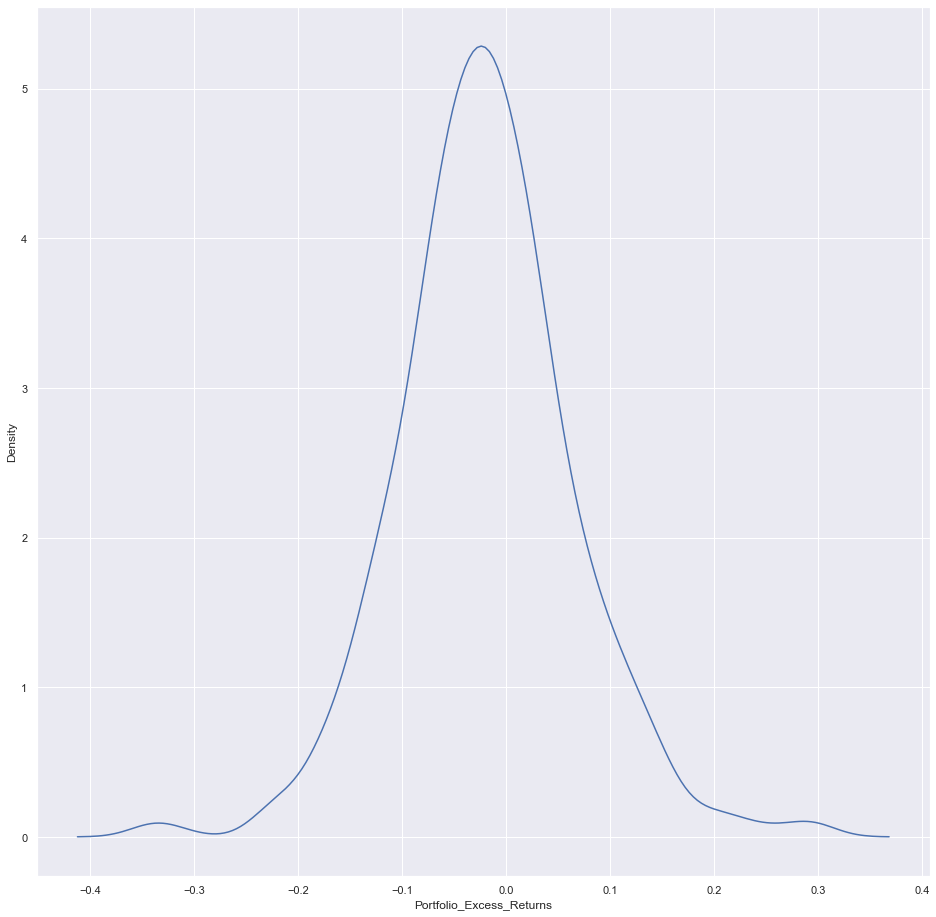

In [105]:
import seaborn as sns
sns.set(rc = {"figure.figsize": (16,16)})
fig1 = sns.kdeplot(stim_model_df2["Portfolio_Excess_Returns"])



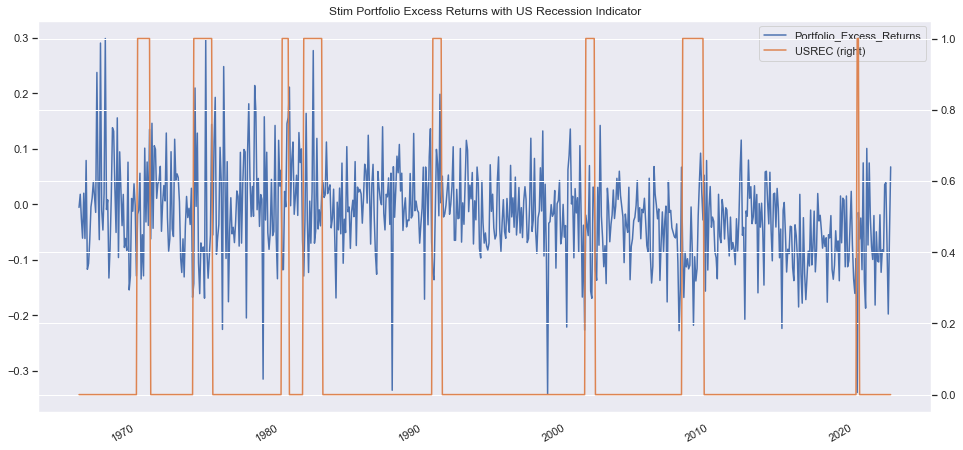

In [106]:
stim_model_df2[["Portfolio_Excess_Returns", "USREC"]].plot(secondary_y = ["USREC"], figsize = (16,8), title = "Stim Portfolio Excess Returns with US Recession Indicator")

## Stim Regressions

In [107]:
X = stim_model_df2[["ExRm", "SMB", "HML", "MOM"]]
y = stim_model_df2["Portfolio_Excess_Returns"]

X = sm.add_constant(X)

model = sm.OLS(y, X)
result = model.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     Portfolio_Excess_Returns   R-squared:                       0.222
Model:                                  OLS   Adj. R-squared:                  0.217
Method:                       Least Squares   F-statistic:                     48.02
Date:                      Tue, 13 Sep 2022   Prob (F-statistic):           1.54e-35
Time:                              14:31:36   Log-Likelihood:                 793.89
No. Observations:                       678   AIC:                            -1578.
Df Residuals:                           673   BIC:                            -1555.
Df Model:                                 4                                         
Covariance Type:                  nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0262      0.003     -8.749      0.000      -0.032      -0.020
ExRm           0.7667      0.069     11.037      0.000       0.630       0.903
SMB            0.5346      0.100      5.353      0.000       0.338       0.731
HML            0.3675      0.103      3.560      0.000       0.165       0.570
MOM            0.0961      0.071      1.345      0.179      -0.044       0.236
==============================================================================
Omnibus:                       29.980   Durbin-Watson:                   1.938
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               62.233
Skew:                           0.253   Prob(JB):                     3.06e-14
Kurtosis:                       4.396   Cond. No.                         38.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [108]:
formula_3 = "Portfolio_Excess_Returns ~ ExRm + SMB + HML + MOM + USREC + USREC * ExRm + USREC * SMB + USREC * HML + USREC * MOM"

interaction_model = smf.ols(formula = formula_3, data = stim_model_df2)
result2 = interaction_model.fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     Portfolio_Excess_Returns   R-squared:                       0.233
Model:                                  OLS   Adj. R-squared:                  0.223
Method:                       Least Squares   F-statistic:                     22.58
Date:                      Tue, 13 Sep 2022   Prob (F-statistic):           1.12e-33
Time:                              14:31:36   Log-Likelihood:                 798.83
No. Observations:                       678   AIC:                            -1578.
Df Residuals:                           668   BIC:                            -1532.
Df Model:                                 9                                         
Covariance Type:                  nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0273      0.003     -8.409      0.000      -0.034      -0.021
ExRm           0.6980      0.081      8.665      0.000       0.540       0.856
SMB            0.5022      0.108      4.658      0.000       0.291       0.714
HML            0.4301      0.117      3.668      0.000       0.200       0.660
MOM            0.1967      0.084      2.338      0.020       0.032       0.362
USREC          0.0080      0.009      0.906      0.365      -0.009       0.025
USREC:ExRm     0.2329      0.167      1.396      0.163      -0.095       0.560
USREC:SMB      0.1409      0.293      0.480      0.631      -0.435       0.717
USREC:HML     -0.2767      0.246     -1.126      0.261      -0.759       0.206
USREC:MOM     -0.2292      0.172     -1.334      0.183      -0.566       0.108
==============================================================================
Omnibus:                       24.410   Durbin-Watson:                   1.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.890
Skew:                           0.189   Prob(JB):                     1.47e-11
Kurtosis:                       4.274   Cond. No.                         107.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""